In [1]:
import numpy as np

filePath = 'data.txt'
data = np.genfromtxt(filePath, delimiter=',', skip_header=1)
np.shape(data)

(700, 152)

In [2]:
# transpose data to get features in columns and samples in rows
data_transpose = np.transpose(data)
data_list = data_transpose.tolist()

# now let's seperate data into "White Light Frame (WL)" and "NBI Frame (NBI)"
# 1 for WL and 2 for NBI
data_WL, data_NBI = [],[]
for i in range(len(data_list)):
    if data_list[i][1] == 1:
        data_WL.append(data_list[i])
    elif data_list[i][1] == 2:
        data_NBI.append(data_list[i])

# checking if the separation was done correctely
print(False in [row[1]==1 for row in data_WL])  # should be False
print(False in [row[1]==2 for row in data_NBI]) # should be False
print((len(data_WL)+len(data_NBI))==len(data_list)) # should be True

False
False
True


In [3]:
# separating features and targets out of data_WL and data_NBI
fea_WL = [row[2:] for row in data_WL]
class_WL = [row[0] for row in data_WL]

fea_NBI = [row[2:] for row in data_NBI]
class_NBI = [row[0] for row in data_NBI]

c:\programdata\miniconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\programdata\miniconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(698, 698)

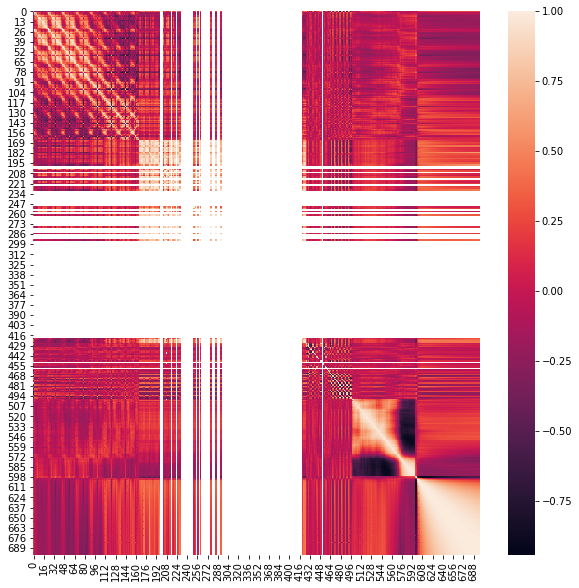

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = np.corrcoef(np.transpose(fea_NBI+fea_WL))
plt.figure(figsize = (10,10))
sns.heatmap(corr)
np.shape(corr)


In [52]:
thres = (corr[:][150] < 0.0000000001)

unique, counts = np.unique(thres, return_counts=True)
print(np.asarray((unique, counts)).T)
sel = np.transpose(np.array(fea_NBI + fea_WL))
np.shape(sel)
np.shape(sel[thres])
selected_features = np.transpose(sel[thres])
np.shape(selected_features)

unique classes:  [[  0 532]
 [  1 166]]


(152, 166)

In [29]:
classes = np.array(class_NBI + class_WL)
# selected_features_class = classes[thres]

In [ ]:
# selected_features_class

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


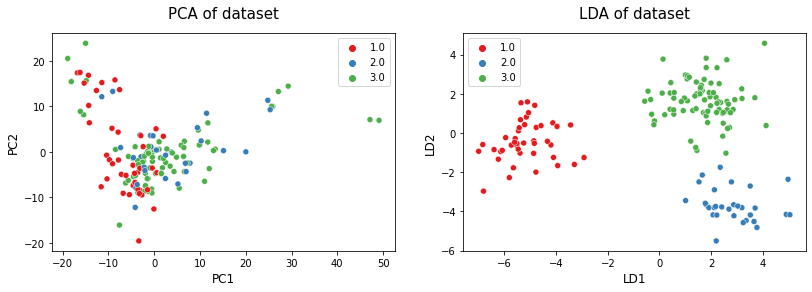

In [43]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# X = selected_features 
# y = classes
X = fea_NBI + fea_WL
y = class_NBI + class_WL

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of dataset", fontsize=15, pad=15)
ax[1].set_title("LDA of dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("LD1", fontsize=12)
ax[1].set_ylabel("LD2", fontsize=12)
plt.savefig('PCA vs LDA.png', dpi=80)

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
# X = selected_features 
# y = classes
X = fea_NBI + fea_WL
y = class_NBI + class_WL

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_)  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

[0.00175933 0.00573765 0.00287537 0.0016026  0.00512768 0.00150045
 0.00222875 0.00134054 0.00196865 0.00208508 0.00163106 0.00079392
 0.00301415 0.00021652 0.00146485 0.0015106  0.0007634  0.0026085
 0.00027426 0.00058743 0.00114097 0.00141138 0.00126395 0.00098791
 0.00176113 0.00201987 0.00061859 0.00308134 0.00217537 0.00233207
 0.00224122 0.00061349 0.         0.00262326 0.00010826 0.00072855
 0.00174216 0.0006207  0.00157503 0.00100735 0.00064833 0.00059163
 0.00116201 0.00035125 0.00136841 0.00096766 0.00226552 0.00274714
 0.00082329 0.00142362 0.00326888 0.00332055 0.00050062 0.00171388
 0.00077433 0.00162677 0.00079392 0.00167419 0.00029677 0.00245381
 0.00104963 0.00187058 0.0004191  0.00074799 0.00116874 0.002446
 0.00198859 0.0013972  0.00224711 0.00242016 0.00341083 0.00165644
 0.00091696 0.00216481 0.00221668 0.00037754 0.00226662 0.
 0.00063748 0.00177563 0.00138694 0.00281964 0.00171762 0.00127806
 0.00237408 0.00170143 0.00224328 0.00128477 0.00306052 0.00041098
 0.000

(152, 292)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC


#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = SVC(kernel = 'linear', C = 1)

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
np.mean(np.absolute(scores))



In [12]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
# X, y = make_classification(n_features=4, random_state=0)

# X = selected_features 
# y = classes
X = fea_NBI + fea_WL
y = class_NBI + class_WL

loo = LeaveOneOut()
for train, test in loo.split(X):
#     print("%s %s" % (train, test))
    clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
#     clf.fit(X[train], y[train])

#     clf.predict(X[test])
#     clf.score(X[test], y[test])
    
    

from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# fit model
	model = RandomForestClassifier(random_state=1)
	model.fit(X_train, y_train)
	# evaluate model
	yhat = model.predict(X_test)
	# store
	y_true.append(y_test[0])
	y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)
    
    

TypeError: list indices must be integers or slices, not tuple

In [13]:
# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
X, y = make_blobs(n_samples=100, random_state=1)

In [51]:
# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

# create dataset
# X, y = make_blobs(n_samples=100, random_state=1)





# X = selected_features 
# y = classes
X = np.array(fea_NBI + fea_WL)
y = np.array(class_NBI + class_WL)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
	# split data
    
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# fit model
# 	model = RandomForestClassifier(random_state=1)
	model = ExtraTreesClassifier(n_estimators=100, random_state=0)
	model.fit(X_train, y_train)
	# evaluate model
	yhat = model.predict(X_test)
	# store
	y_true.append(y_test[0])
	y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.836


In [47]:
#classification with lda
